In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
mean = 0
std = 1

data = np.random.normal(loc=mean, scale=std, size=(100, 2))

# KNN

In [3]:
def eculidean_dist(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def knn(k, pt, neighbors, dist_fn):
    distances = [dist_fn(n, pt) for n in neighbors]
    nn_ids = {k: v for (k, v) in enumerate(distances)}

    sorted_distances = {k: v for k, v in sorted(nn_ids.items(), key=lambda item: item[1])}
    indexes = list(sorted_distances.keys())[:k]

    k_nearest_neighbors = np.array([neighbors[i] for i in indexes])

    return k_nearest_neighbors

Text(0.5, 1.0, 'K Nearest Neighbors of a random point from the data')

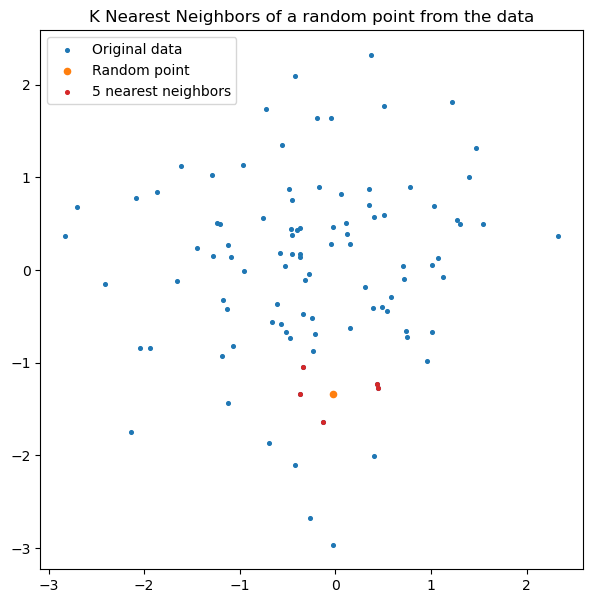

In [4]:
rand_idx = np.random.choice(len(data))

k = 5
k_nearest_neighbors = knn(k=k, pt=data[rand_idx], neighbors=[p for i, p in enumerate(data) if i != rand_idx], dist_fn=eculidean_dist)

plt.figure(figsize=(7, 7))
_ = plt.scatter(data[:, 0], data[:, 1], s=7, c='tab:blue', label='Original data')
_ = plt.scatter(data[rand_idx, 0], data[rand_idx, 1], s=20, c='tab:orange', label='Random point')
_ = plt.scatter(k_nearest_neighbors[:, 0], k_nearest_neighbors[:, 1], s=7, c='tab:red', label=f'{k} nearest neighbors')
_ = plt.legend()
plt.title("K Nearest Neighbors of a random point from the data")

# SMOTE

In [5]:
def smote(data, nb_new_data, k):
    new_data = []

    for i in range(nb_new_data):
        rand_pt_idx = np.random.choice(len(data))
        rand_pt = data[rand_pt_idx]
        k_nearest_neighbors = knn(k=k, pt=rand_pt, neighbors=[p for i, p in enumerate(data) if i != rand_pt_idx], dist_fn=eculidean_dist)

        rand_neighb_idx = np.random.choice(len(k_nearest_neighbors))
        rand_neighb = k_nearest_neighbors[rand_neighb_idx]

        v = rand_neighb - rand_pt
        new_pt = rand_pt + v * np.random.random()

        new_data.append(new_pt)

    new_data = np.array(new_data)
    return new_data

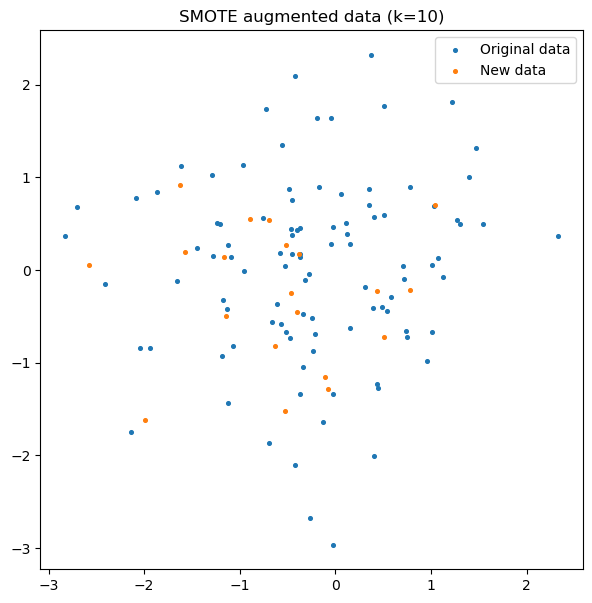

In [6]:
k = 10
nb_new_data = 20
new_data = smote(data, nb_new_data=nb_new_data, k=k)

plt.figure(figsize=(7, 7))
_ = plt.scatter(data[:, 0], data[:, 1], s=7, c='tab:blue', label='Original data')
_ = plt.scatter(new_data[:, 0], new_data[:, 1], s=7, c='tab:orange', label='New data')
_ = plt.legend()
_ = plt.title(f"SMOTE augmented data (k={k})")